In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [41]:
df_lsao = pd.read_csv('lsoa-data-old-boundaries-DataSheet.csv',encoding= 'unicode_escape')
df_lsao.head()


C:\Users\micoa\AppData\Local\Temp\ipykernel_22980\700217537.py:1: DtypeWarning: Columns (757,758,760,761,762,844,845,851,852,853,868,874,875,880,881,886,887,892,893,900,901,916,917,924,925,932,933,949,950,958,959,974,975,994,995,1000,1001,1010,1011,1020,1021,1080) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lsao = pd.read_csv('lsoa-data-old-boundaries-DataSheet.csv',encoding= 'unicode_escape')


,Lower Super Output Area,Names,Mid-year Population Estimates;All Ages;2001,Mid-year Population Estimates;All Ages;2002,Mid-year Population Estimates;All Ages;2003,Mid-year Population Estimates;All Ages;2004,Mid-year Population Estimates;All Ages;2005,Mid-year Population Estimates;All Ages;2006,Mid-year Population Estimates;All Ages;2007,Mid-year Population Estimates;All Ages;2008,Mid-year Population Estimates;All Ages;2009,Mid-year Population Estimates;All Ages;2010,Mid-year Population Estimates;All Ages;2011,Mid-year Population Estimates;All Ages;2012,Mid-year Population Estimates;Aged 0-15;2001,Mid-year Population Estimates;Aged 0-15;2002,Mid-year Population Estimates;Aged 0-15;2003,Mid-year Population Estimates;Aged 0-15;2004,Mid-year Population Estimates;Aged 0-15;2005,Mid-year Population Estimates;Aged 0-15;2006,Mid-year Population Estimates;Aged 0-15;2007,Mid-year Population Estimates;Aged 0-15;2008,Mid-year Population Estimates;Aged 0-15;2009,Mid-year Population Estimates;Aged 0-15;2010,Mid-year Population Estimates;Aged 0-15;2011,Mid-year Population Estimates;Aged 0-15;2012,Mid-year Population Estimates;Aged 16-29;2001,Mid-year Population Estimates;Aged 16-29;2002,Mid-year Population Estimates;Aged 16-29;2003,Mid-year Population Estimates;Aged 16-29;2004,Mid-year Population Estimates;Aged 16-29;2005,Mid-year Population Estimates;Aged 16-29;2006,Mid-year Population Estimates;Aged 16-29;2007,Mid-year Population Estimates;Aged 16-29;2008,Mid-year Population Estimates;Aged 16-29;2009,Mid-year Population Estimates;Aged 16-29;2010,Mid-year Population Estimates;Aged 16-29;2011,Mid-year Population Estimates;Aged 16-29;2012,Mid-year Population Estimates;Aged 30-44;2001,Mid-year Population Estimates;Aged 30-44;2002,Mid-year Population Estimates;Aged 30-44;2003,Mid-year Population Estimates;Aged 30-44;2004,Mid-year Population Estimates;Aged 30-44;2005,Mid-year Population Estimates;Aged 30-44;2006,Mid-year Population Estimates;Aged 30-44;2007,Mid-year Population Estimates;Aged 30-44;2008,Mid-year Population Estimates;Aged 30-44;2009,Mid-year Population Estimates;Aged 30-44;2010,Mid-year Population Estimates;Aged 30-44;2011,Mid-year Population Estimates;Aged 30-44;2012,Mid-year Population Estimates;Aged 45-64;2001,Mid-year Population Estimates;Aged 45-64;2002,Mid-year Population Estimates;Aged 45-64;2003,Mid-year Population Estimates;Aged 45-64;2004,Mid-year Population Estimates;Aged 45-64;2005,Mid-year Population Estimates;Aged 45-64;2006,Mid-year Population Estimates;Aged 45-64;2007,Mid-year Population Estimates;Aged 45-64;2008,Mid-year Population Estimates;Aged 45-64;2009,Mid-year Population Estimates;Aged 45-64;2010,Mid-year Population Estimates;Aged 45-64;2011,Mid-year Population Estimates;Aged 45-64;2012,Mid-year Population Estimates;Aged 65+;2001,Mid-year Population Estimates;Aged 65+;2002,Mid-year Population Estimates;Aged 65+;2003,Mid-year Population Estimates;Aged 65+;2004,Mid-year Population Estimates;Aged 65+;2005,Mid-year Population Estimates;Aged 65+;2006,Mid-year Population Estimates;Aged 65+;2007,Mid-year Population Estimates;Aged 65+;2008,Mid-year Population Estimates;Aged 65+;2009,Mid-year Population Estimates;Aged 65+;2010,Mid-year Population Estimates;Aged 65+;2011,Mid-year Population Estimates;Aged 65+;2012,Mid-year Population Estimates;Working-age;2001,Mid-year Population Estimates;Working-age;2002,Mid-year Population Estimates;Working-age;2003,Mid-year Population Estimates;Working-age;2004,Mid-year Population Estimates;Working-age;2005,Mid-year Population Estimates;Working-age;2006,Mid-year Population Estimates;Working-age;2007,Mid-year Population Estimates;Working-age;2008,Mid-year Population Estimates;Working-age;2009,Mid-year Population Estimates;Working-age;2010,Mid-year Population Estimates;Working-age;2011,Mid-year Population Estimates;Working-age;2012,2011 Census Population;Age Structure;All Ages,2011 Census Population;Age Structure;0-15,2011 Census Population;Age Structure;16-29,2011 Census Population

In [42]:
df_lsao = df_lsao[['Lower Super Output Area','The IMD 2010 Underlying Indicators;Health;Mood and anxiety disorders indicator']]
df_lsao.head()

,Lower Super Output Area,The IMD 2010 Underlying Indicators;Health;Mood and anxiety disorders indicator
0,E01000001,-2.27
1,E01000002,-2.37
2,E01000003,-0.93
3,E01000004,-1.70
4,E01000005,-1.11


In [43]:
def reverse_encode(df,column_name,look_up_table_df):
    df_look_table_column = look_up_table_df[look_up_table_df['column_name']==column_name]
    df_look_table_column.drop('column_name',axis =1,inplace=True)
    mapping_dict = dict()
    for index,row in df_look_table_column.iterrows():
        mapping_dict[row['Encoding']] = row['Value']
    print(df[column_name].replace(mapping_dict))
    df[column_name] = df[column_name].replace(mapping_dict)
    

In [44]:
df_look_up = pd.read_csv('look_up_table.csv')
df_look_up_lsoa = df_look_up[df_look_up['column_name']=='lsoa_of_accident_location']
df_look_up_lsoa.drop('column_name',axis =1,inplace=True)
df_look_up_lsoa.head()

C:\Users\micoa\AppData\Local\Temp\ipykernel_22980\1453408598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_look_up_lsoa.drop('column_name',axis =1,inplace=True)


,Value,Encoding
701,E01000001,0
702,E01000002,1
703,E01000004,2
704,E01000005,3
705,E01000006,4


In [45]:
mapping_dict = dict()
for index,row in df_look_up_lsoa.iterrows():
    mapping_dict[row['Value']] = row['Encoding']
mapping_dict

{'E01000001': 0,
 'E01000002': 1,
 'E01000004': 2,
 'E01000005': 3,
 'E01000006': 4,
 'E01000007': 5,
 'E01000008': 6,
 'E01000009': 7,
 'E01000010': 8,
 'E01000011': 9,
 'E01000013': 10,
 'E01000014': 11,
 'E01000015': 12,
 'E01000016': 13,
 'E01000017': 14,
 'E01000018': 15,
 'E01000019': 16,
 'E01000020': 17,
 'E01000021': 18,
 'E01000022': 19,
 'E01000023': 20,
 'E01000024': 21,
 'E01000026': 22,
 'E01000027': 23,
 'E01000029': 24,
 'E01000030': 25,
 'E01000031': 26,
 'E01000032': 27,
 'E01000033': 28,
 'E01000034': 29,
 'E01000035': 30,
 'E01000036': 31,
 'E01000037': 32,
 'E01000038': 33,
 'E01000039': 34,
 'E01000041': 35,
 'E01000042': 36,
 'E01000043': 37,
 'E01000044': 38,
 'E01000045': 39,
 'E01000046': 40,
 'E01000047': 41,
 'E01000048': 42,
 'E01000049': 43,
 'E01000050': 44,
 'E01000051': 45,
 'E01000052': 46,
 'E01000053': 47,
 'E01000055': 48,
 'E01000056': 49,
 'E01000057': 50,
 'E01000058': 51,
 'E01000059': 52,
 'E01000060': 53,
 'E01000061': 54,
 'E01000062': 55,
 '

In [46]:
lsao_values = df_look_up_lsoa['Value'].unique()
df_lsao = df_lsao[df_lsao['Lower Super Output Area'].isin(lsao_values)]
df_lsao.rename(columns = {'encoded_lsoa':'lsoa_of_accident_location','The IMD 2010 Underlying Indicators;Health;Mood and anxiety disorders indicator':'Mood and anxiety disorders indicator'}, inplace = True)
df_lsao['lsoa_of_accident_location'] = df_lsao["Lower Super Output Area"].replace(mapping_dict)
df_mood_index = df_lsao.drop('Lower Super Output Area',axis =1)
df_mood_index.head()

,Mood and anxiety disorders indicator,lsoa_of_accident_location
0,-2.27,0
1,-2.37,1
3,-1.70,2
4,-1.11,3
5,-0.69,4


In [47]:
df_accidents = pd.read_csv('Final_Output.csv')
df_accidents.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,is_Weekend,is_Dark_and_Raining,Month,Day,Hour,Minutes
0,-0.192203,51.495766,29,1,1,1,166,168,89,0,1,0,1,1,0,2426,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,13,16,54
1,-0.165408,51.495710,29,2,2,1,166,168,89,0,1,0,1,1,0,2433,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,11,1,19,45
2,-0.170401,51.489763,29,1,1,1,166,168,89,304,1,-1,1,1,0,2522,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,19,17,30
3,-0.194856,51.497875,29,1,2,3,166,168,89,0,1,0,1,1,0,2427,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,25,23,40
4,-0.182783,51.482671,29,1,2,1,166,168,89,3220,1,-1,1,0,0,2521,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,6,1,6,20


In [48]:
df_accidents_augmented =df_accidents.merge(df_mood_index)

In [49]:
df_accidents_augmented.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,is_Weekend,is_Dark_and_Raining,Month,Day,Hour,Minutes,Mood and anxiety disorders indicator
0,-0.192203,51.495766,29,1,1,1,166,168,89,0,1,0,1,1,0,2426,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,13,16,54,-0.91
1,-0.165408,51.495710,29,2,2,1,166,168,89,0,1,0,1,1,0,2433,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,11,1,19,45,-1.81
2,-0.163669,51.499549,29,1,1,1,166,168,89,4,1,-1,1,1,0,2433,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,7,1,15,20,-1.81
3,-0.164551,51.499113,29,1,2,1,166,168,89,4,1,0,1,1,0,2433,12,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,3,21,16,0,-1.81
4,-0.167355,51.497449,29,1,2,1,166,168,89,4,1,0,1,1,0,2433,13,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [50]:
reverse_encode(df_accidents_augmented,'accident_severity',df_look_up)

0         Slight
1        Serious
2         Slight
3         Slight
4         Slight
          ...   
24332     Slight
24333     Slight
24334     Slight
24335     Slight
24336     Slight
Name: accident_severity, Length: 24337, dtype: object


C:\Users\micoa\AppData\Local\Temp\ipykernel_22980\2514376080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_look_table_column.drop('column_name',axis =1,inplace=True)


In [51]:
df_accidents_augmented.head()

,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,is_Weekend,is_Dark_and_Raining,Month,Day,Hour,Minutes,Mood and anxiety disorders indicator
0,-0.192203,51.495766,29,Slight,1,1,166,168,89,0,1,0,1,1,0,2426,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,13,16,54,-0.91
1,-0.165408,51.495710,29,Serious,2,1,166,168,89,0,1,0,1,1,0,2433,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,11,1,19,45,-1.81
2,-0.163669,51.499549,29,Slight,1,1,166,168,89,4,1,-1,1,1,0,2433,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,7,1,15,20,-1.81
3,-0.164551,51.499113,29,Slight,2,1,166,168,89,4,1,0,1,1,0,2433,12,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,3,21,16,0,-1.81
4,-0.167355,51.497449,29,Slight,2,1,166,168,89,4,1,0,1,1,0,2433,13,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,

In [52]:
min_mood = df_accidents_augmented['Mood and anxiety disorders indicator'].min()
max_mood = df_accidents_augmented['Mood and anxiety disorders indicator'].max()
# df_accidents_augmented['mood_discrete'] = pd.cut(x=df_titanic_cca['Age'],
#                                     bins=intervals,
#                                     labels=labels,
#                                     include_lowest=True)

df_accidents_augmented['Mood_categories'] = pd.cut(df_accidents_augmented['Mood and anxiety disorders indicator'], 4,\
                            labels = ['Very Content','Content','Deprived','Very Deprived'])    

df_accidents_augmented.head()


,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,is_Urban,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Motorway,second_road_class_Unclassified,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,junction_detail_Crossroads,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,special_conditions_at_site_Auto signal part defective,special_conditions_at_site_Auto traffic signal - out,special_conditions_at_site_Mud,special_conditions_at_site_Oil or diesel,special_conditions_at_site_Road sign or marking defective or obscured,special_conditions_at_site_Road surface defective,special_conditions_at_site_Roadworks,carriageway_hazards_Any animal in carriageway (except ridden horse),carriageway_hazards_Other object on road,carriageway_hazards_Pedestrian in carriageway - not injured,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,is_Weekend,is_Dark_and_Raining,Month,Day,Hour,Minutes,Mood and anxiety disorders indicator,Mood_categories
0,-0.192203,51.495766,29,Slight,1,1,166,168,89,0,1,0,1,1,0,2426,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,13,16,54,-0.91,Content
1,-0.165408,51.495710,29,Serious,2,1,166,168,89,0,1,0,1,1,0,2433,44,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,11,1,19,45,-1.81,Very Content
2,-0.163669,51.499549,29,Slight,1,1,166,168,89,4,1,-1,1,1,0,2433,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,7,1,15,20,-1.81,Very Content
3,-0.164551,51.499113,29,Slight,2,1,166,168,89,4,1,0,1,1,0,2433,12,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,3,21,16,0,-1.81,Very Content
4,-0.167355,51.497449,29,Slight,2,1,166,168,89,4,1,0,1,1,0,2433,13,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0

In [56]:
df_accidents_augmented.groupby(x)[y].value_counts(normalize=True).mul(100)

Mood_categories  accident_severity
Very Content     Slight               87.979275
                 Serious              11.502591
                 Fatal                 0.518135
Content          Slight               89.554694
                 Serious               9.951827
                 Fatal                 0.493479
Deprived         Slight               88.771415
                 Serious              10.518599
                 Fatal                 0.709986
Very Deprived    Slight               87.808723
                 Serious              11.508145
                 Fatal                 0.683132
Name: accident_severity, dtype: float64

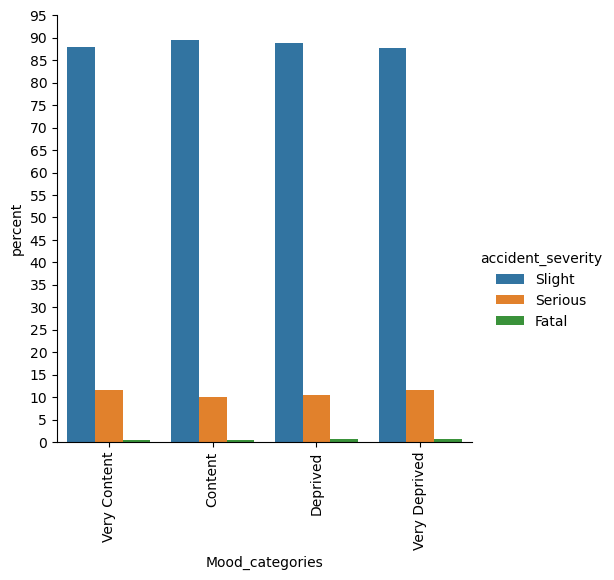

In [54]:
x,y = 'Mood_categories', 'accident_severity'

(df_accidents_augmented
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 100, 5.0))
plt.show()

<AxesSubplot:>

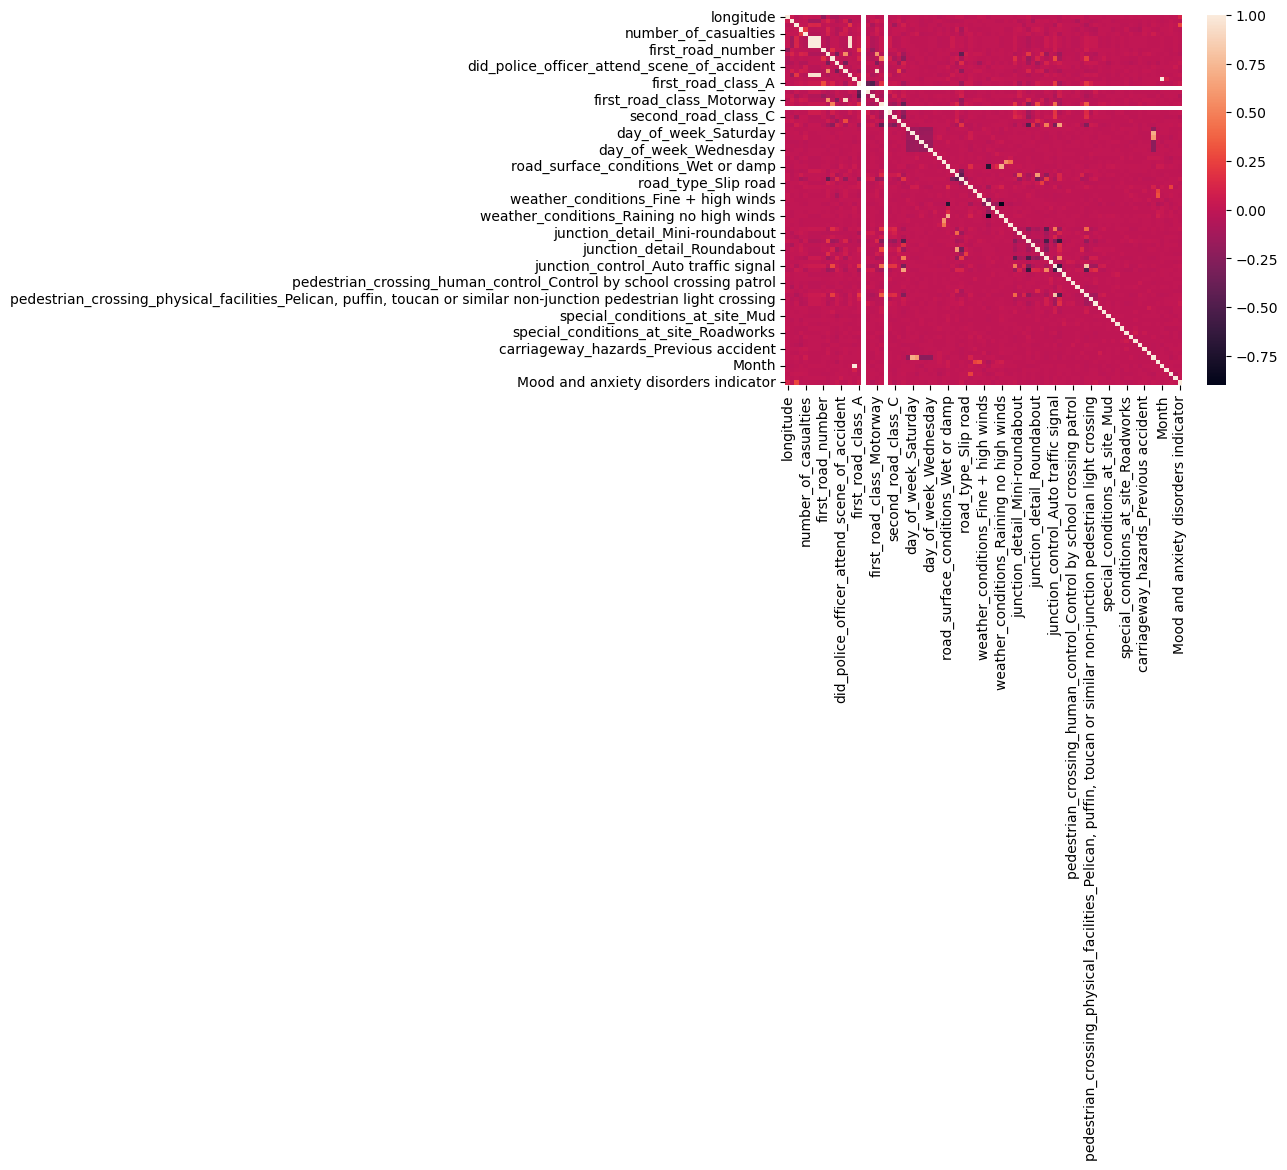

In [58]:
sns.heatmap(df_accidents_augmented.corr())

<AxesSubplot:xlabel='Mood_categories', ylabel='number_of_casualties'>

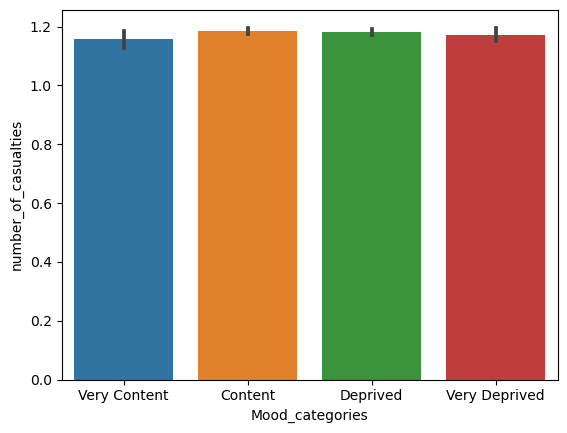

In [68]:
x,y = 'Mood_categories', 'number_of_casualties'

sns.barplot(data=df_accidents_augmented, x=x, y=y)

In [62]:
df_accidents_augmented.groupby(x)[y].mean()

Mood_categories
Very Content     1.157513
Content          1.185407
Deprived         1.181664
Very Deprived    1.172359
Name: number_of_casualties, dtype: float64